# Dataset reduction

In [1]:
import pandas as pd

df_complete = pd.read_csv("chatgpt_reddit - Complete.csv")

In [2]:
df_complete['Post flair type'].unique()

array(['Jailbreak', 'Educational Purpose Only ',
       'Artificial Intelligence', 'Funny ', 'Gone Wild ', 'News 📰', nan,
       'Other ', 'Society', 'Prompt engineering ', 'Misleading',
       'School & College', 'Funny :snoo_facepalm:', 'Use cases ',
       'Recipe', 'Serious replies only :closed-ai:', "✨Mods' Chosen✨",
       'Politics', 'Funny', 'RANT:snoo_disapproval:', 'AI',
       'Another AI / ChatGPT Post 🤖', 'Question?', 'Company News',
       'Business', 'Resources '], dtype=object)

In [3]:
filter1 = df_complete['Post flair type'] != 'Jailbreak'
filter2 = ~df_complete['Post flair type'].astype(str).str.contains('snoo_')
filter3 = ~df_complete['Post flair type'].astype(str).str.contains('Funny')
filter4 = ~df_complete['Post flair type'].astype(str).str.contains('Prompt')
filter5 = ~df_complete['Post flair type'].astype(str).str.contains('Mods')

df = df_complete[filter1 & filter2 & filter3 & filter4 & filter5].copy()
df['Post flair type'].unique()

array(['Educational Purpose Only ', 'Artificial Intelligence',
       'Gone Wild ', 'News 📰', nan, 'Other ', 'Society', 'Misleading',
       'School & College', 'Use cases ', 'Recipe',
       'Serious replies only :closed-ai:', 'Politics', 'AI',
       'Another AI / ChatGPT Post 🤖', 'Question?', 'Company News',
       'Business', 'Resources '], dtype=object)

In [4]:
len(df_complete['Post flair type'].unique())

26

In [5]:
len(df['Post flair type'].unique())

19

# NLTK.VADER_LEXICON

In [6]:
import pandas as pd

#df = pd.read_csv("chatgpt_reddit.csv")
df.head(5)

,Post ID,Post author,Post title,Post URL,Post flair type,Post score,Post date,Comment ID,Comment author,Comment,Comment score,Comment date,Parent Comment ID,Parent comment author
505,13ds87o,King_In_The_East,Being accused for using ChatGPT in my assignme...,https://www.reddit.com/r/ChatGPT/comments/13ds...,Educational Purpose Only,11873,2023-05-10 16:24:17,jjlul7m,AutoModerator,"Hey /u/King_In_The_East, please respond to thi...",1,2023-05-10 16:24:17,13ds87o,King_In_The_East
506,13ds87o,King_In_The_East,Being accused for using ChatGPT in my assignme...,https://www.reddit.com/r/ChatGPT/comments/13ds...,Educational Purpose Only,11873,2023-05-10 16:24:17,jjm42vc,elusivehonor,People in here are giving really bad advice. \...,9648,2023-05-10 17:28:26,13ds87o,King_In_The_East
507,13ds87o,King_In_The_East,Being accused for using ChatGPT in my assignme...,https://www.reddit.com/r/ChatGPT/comments/13ds...,Educational Purpose Only,11873,2023-05-10 16:24:17,jjm4m5v,Great_Bad_6045,I wouldn't be worried. They are calling you in...,65,2023-05-10 17:31:58,13ds87o,King_In_The_East
508,13ds87o,King_In_The_East,Being accused for using ChatGPT in my assignme...,https://www.reddit.com/r/ChatGPT/comments/13ds...,Educational Purpose Only,11873,2023-05-10 16:24:17,jjmcdmk,american_amina,"Show your work. Old advice, but helpful. I wou...",58,2023-05-10 18:21:03,13ds87o,King_In_The_East
509,13ds87o,King_In_The_East,Being accused for using ChatGPT in my assignme...,https://www.reddit.com/r/ChatGPT/comments/13ds...,Educational Purpose Only,11873,2023-05-10 16:24:17,jjmhtwj,appmapper,"> i put references in my work, up to 31 source...",55,2023-05-10 18:55:28,13ds87o,King_In_The_East


## Preprocessing

In [7]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import re

def clean_data(review):
    
    no_punc = re.sub(r'[^\w\s]', '', review)
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])
    
    return(no_digits)

df['Post title'] = df['Post title'].apply(clean_data)
df['Comment'] = df['Comment'].apply(clean_data)

In [8]:
stop_words = set(stopwords.words('english'))  # Import english stop words
df['Comment'] = df['Comment'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))  # Remove stop words

## Sentiment analysis

In [9]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


In [10]:
df['Sentiment'] = ''
for index, row in df.iterrows():
    comment = row['Comment']
    
    # Applica VADER all'attuale commento
    scores = sia.polarity_scores(comment)
    compound_score = scores['compound']
    
    # Assegna un'etichetta di sentiment in base al punteggio compound
    if compound_score > 0:
        sentiment = 'pos'
    elif compound_score < 0:
        sentiment = 'neg'
    else:
        sentiment = 'neu'
    
    # Assegna l'etichetta di sentiment al DataFrame
    df.at[index, 'Sentiment'] = sentiment

# Stampa il DataFrame con le nuove etichette di sentiment
df['Sentiment'].value_counts()

pos    28140
neg    14356
neu    14269
Name: Sentiment, dtype: int64

## Sentiment distribution

In [11]:
sizes = df["Sentiment"].value_counts()
labels = df["Sentiment"].unique()

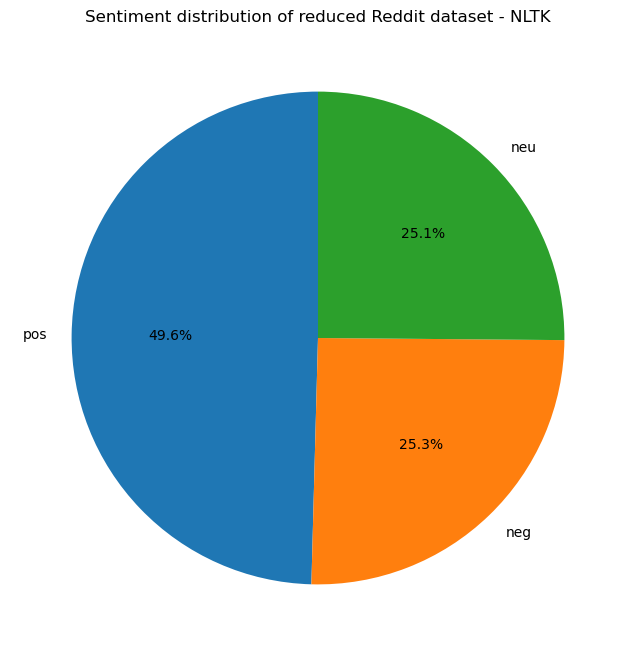

In [12]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = False, startangle = 90)
plt.title("Sentiment distribution of reduced Reddit dataset - NLTK")
plt.savefig("pie_nltksentiment.png")
plt.show()

# TextBlob

## Preprocessing

In [13]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import re

def clean_data(review):
    
    no_punc = re.sub(r'[^\w\s]', '', review)
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])
    
    return(no_digits)

df['Post title'] = df['Post title'].apply(clean_data)
df['Comment'] = df['Comment'].apply(clean_data)

In [14]:
stop_words = set(stopwords.words('english'))  # Import english stop words
df['Comment'] = df['Comment'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))  # Remove stop words

## Sentiment analysis

In [15]:
from textblob import TextBlob

# Crea una nuova colonna nel DataFrame per le etichette di sentiment
df['Sentiment'] = ''

# Itera attraverso ogni riga del DataFrame
for index, row in df.iterrows():
    comment = row['Comment']
    
    # Applica l'analisi dei sentimenti di TextBlob all'attuale commento
    blob = TextBlob(comment)
    sentiment = blob.sentiment.polarity
    
    # Assegna un'etichetta di sentiment in base alla polarità
    if sentiment > 0:
        sentiment_label = 'pos'
    elif sentiment < 0:
        sentiment_label = 'neg'
    else:
        sentiment_label = 'neu'
    
    # Assegna l'etichetta di sentiment al DataFrame
    df.at[index, 'Sentiment'] = sentiment_label

# Stampa il DataFrame con le nuove etichette di sentiment
df['Sentiment'].value_counts()

pos    27363
neu    17804
neg    11598
Name: Sentiment, dtype: int64

## Sentiment distribution

In [16]:
sizes = df["Sentiment"].value_counts()
labels = df["Sentiment"].unique()

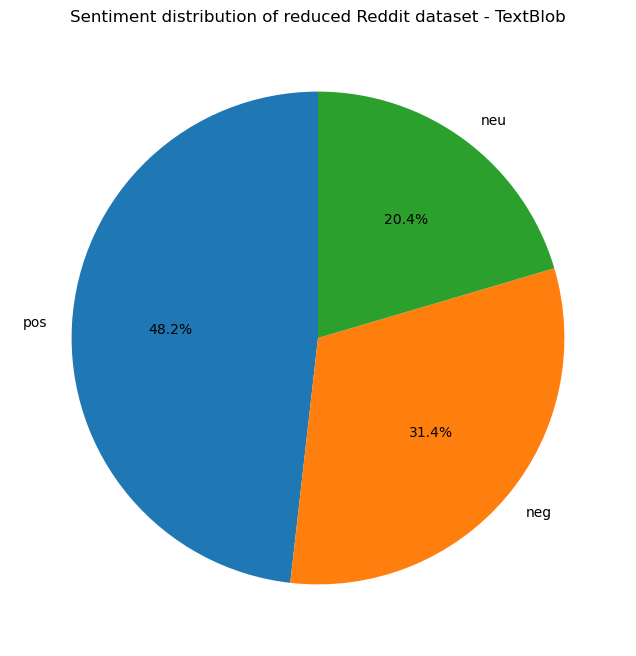

In [17]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = False, startangle = 90)
plt.title("Sentiment distribution of reduced Reddit dataset - TextBlob")
plt.savefig("pie_textblobsentiment.png")
plt.show()